In [2]:
!which python

/Users/awlego/Repositories/ml-num-dots/env3.10/bin/python


In [106]:
import ollama
import pandas as pd
import os
from datetime import datetime
import time
from tqdm import tqdm
import itertools
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [83]:
pkl_name_1_5b = "results/experiment_0/dot_counting_results_deepseek-r1_1.5b_20250227_092228.pkl"
pkl_name_7b = "results/experiment_0/dot_counting_results_deepseek-r1_7b_20250227_092228.pkl"
pkl_name_14b = "results/experiment_0/dot_counting_results_deepseek-r1_14b_20250227_092228.pkl"
pkl_name_32b = "results/experiment_0/dot_counting_results_deepseek-r1_32b_20250227_092228.pkl"

df_1_5b = pd.read_pickle(pkl_name_1_5b)
df_7b = pd.read_pickle(pkl_name_7b)
df_14b = pd.read_pickle(pkl_name_14b)
df_32b = pd.read_pickle(pkl_name_32b)

tenx_pkl_folder = "results/experiment_1"
tenx_pkl_files = [f for f in os.listdir(tenx_pkl_folder) if f.endswith(".pkl")]
tenx_pkl_name_1_5b = os.path.join(tenx_pkl_folder, [f for f in tenx_pkl_files if "r1_1.5b" in f][0])
tenx_pkl_name_7b = os.path.join(tenx_pkl_folder, [f for f in tenx_pkl_files if "r1_7b" in f][0])
tenx_pkl_name_14b = os.path.join(tenx_pkl_folder, [f for f in tenx_pkl_files if "r1_14b" in f][0])
tenx_pkl_name_32b = os.path.join(tenx_pkl_folder, [f for f in tenx_pkl_files if "r1_32b" in f][0])

df_1_5b_tenx = pd.read_pickle(tenx_pkl_name_1_5b)
df_7b_tenx = pd.read_pickle(tenx_pkl_name_7b)
df_14b_tenx = pd.read_pickle(tenx_pkl_name_14b)
df_32b_tenx = pd.read_pickle(tenx_pkl_name_32b)



In [75]:
# Add a 'model' column to each dataframe
df_1_5b['model'] = '1.5b'
df_7b['model'] = '7b'
df_14b['model'] = '14b'
df_32b['model'] = '32b'
# Merge all dataframes into one
df = pd.concat([df_1_5b, df_7b, df_14b, df_32b], ignore_index=True)
model_size_dict = {'1.5b': 1.5, '7b': 7, '14b': 14, '32b': 32}

df.head()


,model,prompt_type,sequence_type,prompt,actual_count,model_answer,extracted_number,correct
0,1.5b,1,1,Do not use code. How many periods/dots '.' are...,1,"<think>\nFirst, I will examine the given seque...",1,True
1,1.5b,1,1,Do not use code. How many periods/dots '.' are...,2,<think>\nI need to determine how many dots (.)...,2,True
2,1.5b,1,1,Do not use code. How many periods/dots '.' are...,3,<think>\nI need to determine how many periods ...,3,True
3,1.5b,1,1,Do not use code. How many periods/dots '.' are...,4,"<think>\nFirst, I will examine the given seque...",3,False
4,1.5b,1,1,Do not use code. How many periods/dots '.' are...,5,<think>\nI need to determine how many periods ...,5,True


In [84]:
df_1_5b_tenx['model'] = '1.5b'
df_7b_tenx['model'] = '7b'
df_14b_tenx['model'] = '14b'
df_32b_tenx['model'] = '32b'
df_10x = pd.concat([df_1_5b_tenx, df_7b_tenx, df_14b_tenx, df_32b_tenx], ignore_index=True)
# df = df_10x

In [76]:
df.groupby('model').mean(numeric_only=True)['correct'].sort_index(key=lambda x: x.map(model_size_dict))

model
1.5b    0.28
7b      0.36
14b     0.52
32b     0.57
Name: correct, dtype: float64

In [85]:
df_10x.groupby('model').mean(numeric_only=True)['correct'].sort_index(key=lambda x: x.map(model_size_dict))

model
1.5b    0.384
7b      0.372
14b     0.540
32b     0.748
Name: correct, dtype: float64

better models do better

In [77]:
df.groupby('actual_count').mean(numeric_only=True)['correct']


actual_count
1     1.0000
2     1.0000
3     1.0000
4     0.8750
5     0.7500
6     0.8125
7     0.7500
8     0.7500
9     0.5000
10    0.6250
11    0.2500
12    0.5000
13    0.3750
14    0.2500
15    0.1875
16    0.1250
17    0.0000
18    0.1250
19    0.0625
20    0.3125
21    0.0625
22    0.0000
23    0.0625
24    0.2500
25    0.1875
Name: correct, dtype: float64

generally models get worse as number of dots increases, but there are some exceptions. 12 is better than 11, 20 and 24 also get bumps.

In [78]:
df.groupby('prompt_type').mean(numeric_only=True)['correct']


prompt_type
1    0.440
2    0.425
Name: correct, dtype: float64

interesting! the simple prompting is better!

In [79]:
df.groupby('sequence_type').mean(numeric_only=True)['correct']


sequence_type
1    0.365
2    0.500
Name: correct, dtype: float64

As expected, tokenizing the sequence with spaces is better.

In [80]:
df.groupby(['sequence_type', 'prompt_type']).mean(numeric_only=True)['correct']


sequence_type  prompt_type
1              1              0.39
               2              0.34
2              1              0.49
               2              0.51
Name: correct, dtype: float64

In [81]:
df.groupby(['model', 'sequence_type']).mean(numeric_only=True)['correct'].sort_index(key=lambda x: x.map(model_size_dict))


model  sequence_type
1.5b   1                0.16
       2                0.40
7b     1                0.38
       2                0.34
14b    1                0.46
       2                0.58
32b    1                0.46
       2                0.68
Name: correct, dtype: float64

hmm nothing really interesting to me here

In [82]:
df.groupby(['model', 'prompt_type']).mean(numeric_only=True)['correct'].sort_index(key=lambda x: x.map(model_size_dict))



model  prompt_type
1.5b   1              0.26
       2              0.30
7b     1              0.40
       2              0.32
14b    1              0.56
       2              0.48
32b    1              0.54
       2              0.60
Name: correct, dtype: float64

In [93]:
df.groupby(['model', 'actual_count']).mean(numeric_only=True)['correct'].sort_index(key=lambda x: x.map(model_size_dict))


model  actual_count
1.5b   1               1.00
       2               1.00
       3               1.00
       4               0.75
       5               0.75
                       ... 
32b    21              0.00
       22              0.00
       23              0.00
       24              0.50
       25              0.50
Name: correct, Length: 100, dtype: float64

In [109]:
# df_10x was run with repeats but also only the spaces between periods and only the first prompt
df_10x.groupby(['model', 'actual_count']).mean(numeric_only=True)['correct'].sort_index(key=lambda x: x.map(model_size_dict))


model  actual_count
1.5b   1               1.0
       2               1.0
       3               0.9
       4               0.9
       5               1.0
                      ... 
32b    21              0.5
       22              0.3
       23              0.2
       24              0.5
       25              0.6
Name: correct, Length: 100, dtype: float64

weird! the 1.5b and 32b model get value from the reminder to double check the answer, but the middle models don't. I'm super curious to see if this replicates in the 10x run.

/var/folders/_4/45mv5nqd1m1_xtw1k2q21zdc0000gn/T/ipykernel_21571/3566746071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=prompt_accuracy.index, y=prompt_accuracy.values, palette=colors)


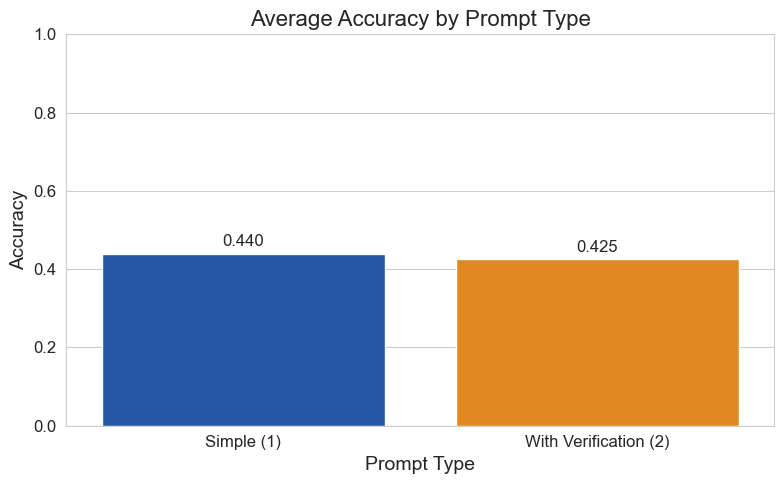

/var/folders/_4/45mv5nqd1m1_xtw1k2q21zdc0000gn/T/ipykernel_21571/3566746071.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sequence_accuracy.index, y=sequence_accuracy.values, palette=colors)


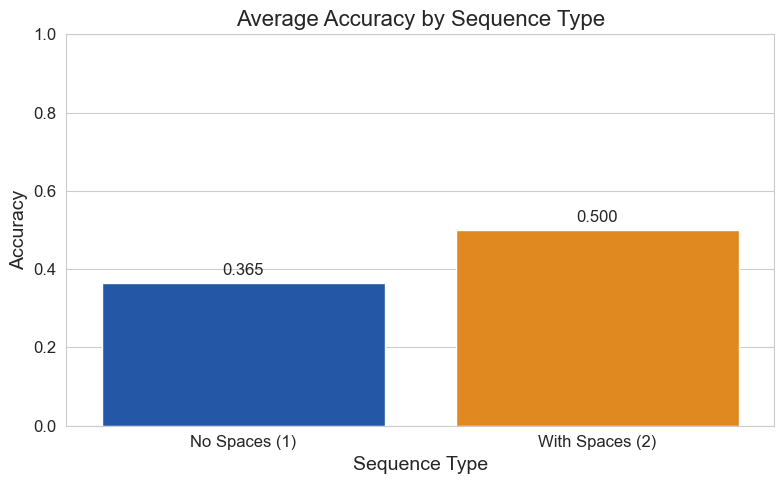

<Figure size 1000x600 with 0 Axes>

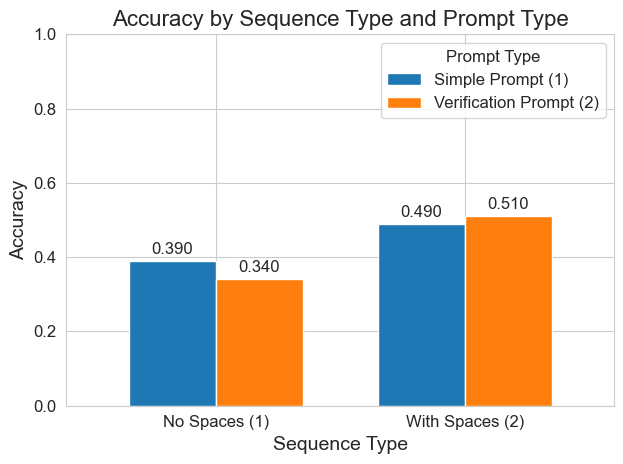

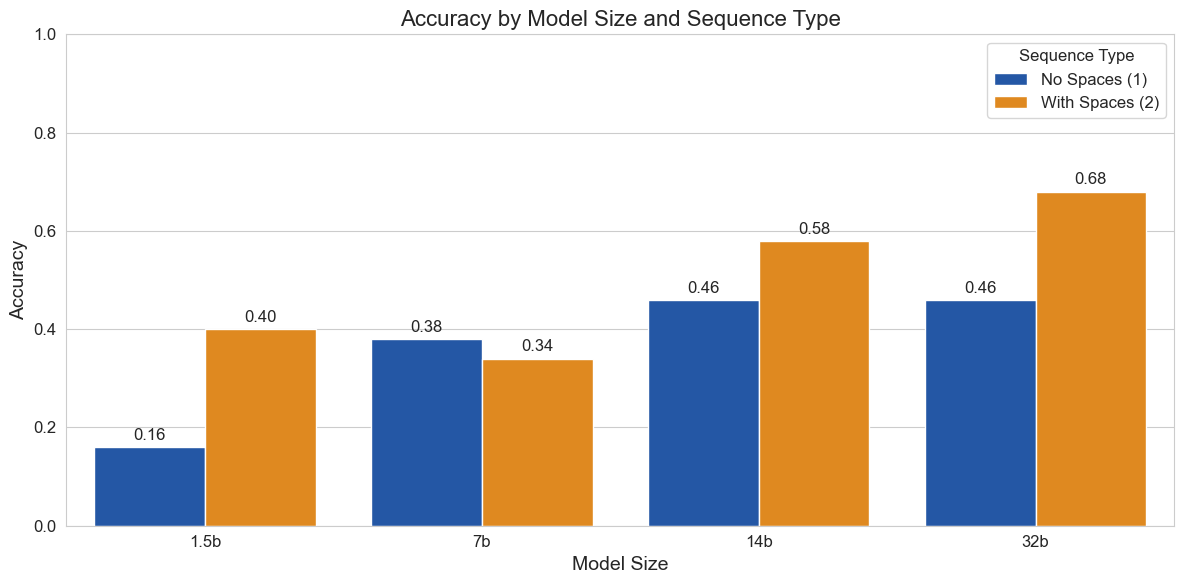

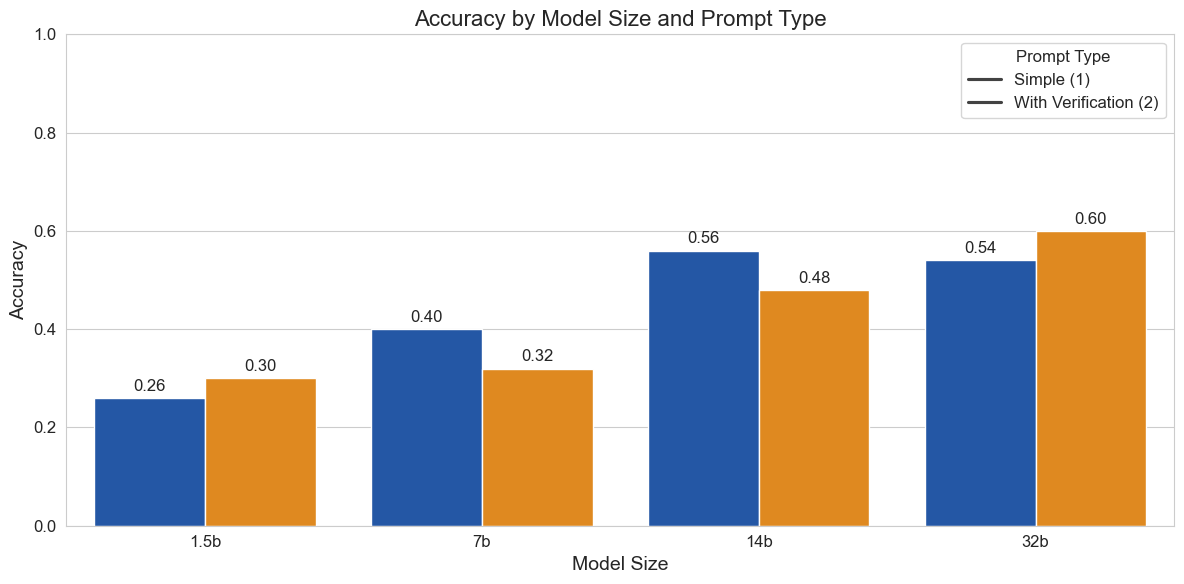

/var/folders/_4/45mv5nqd1m1_xtw1k2q21zdc0000gn/T/ipykernel_21571/3566746071.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=accuracy_by_model.index, y=accuracy_by_model.values, palette=colors)
/var/folders/_4/45mv5nqd1m1_xtw1k2q21zdc0000gn/T/ipykernel_21571/3566746071.py:99: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=accuracy_by_model.index, y=accuracy_by_model.values, palette=colors)


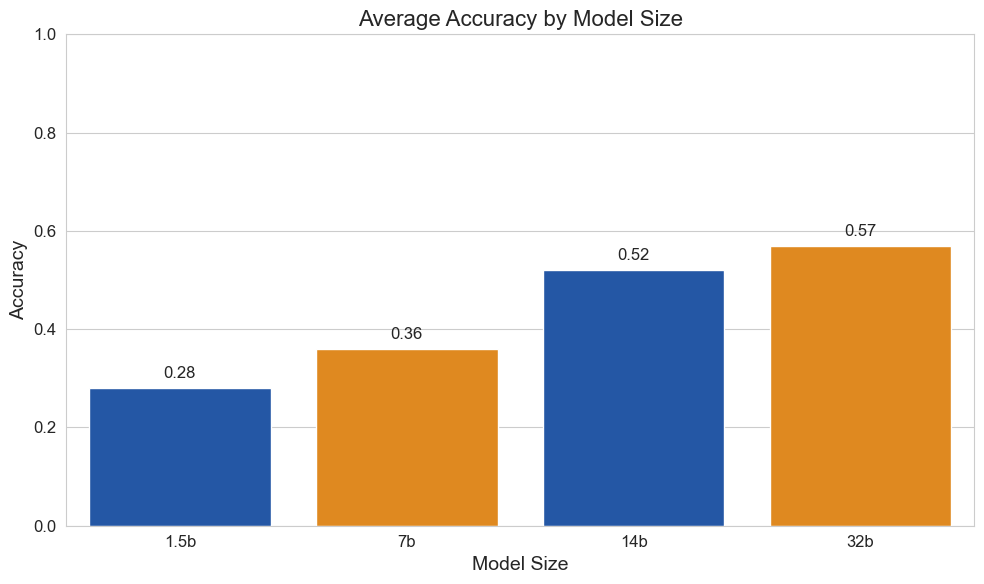

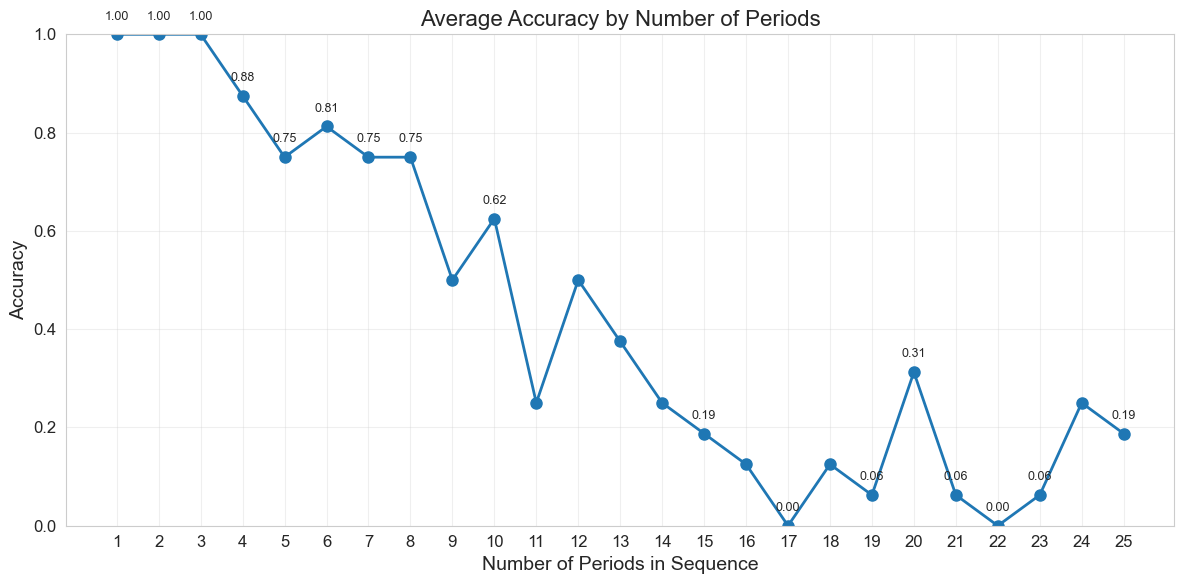

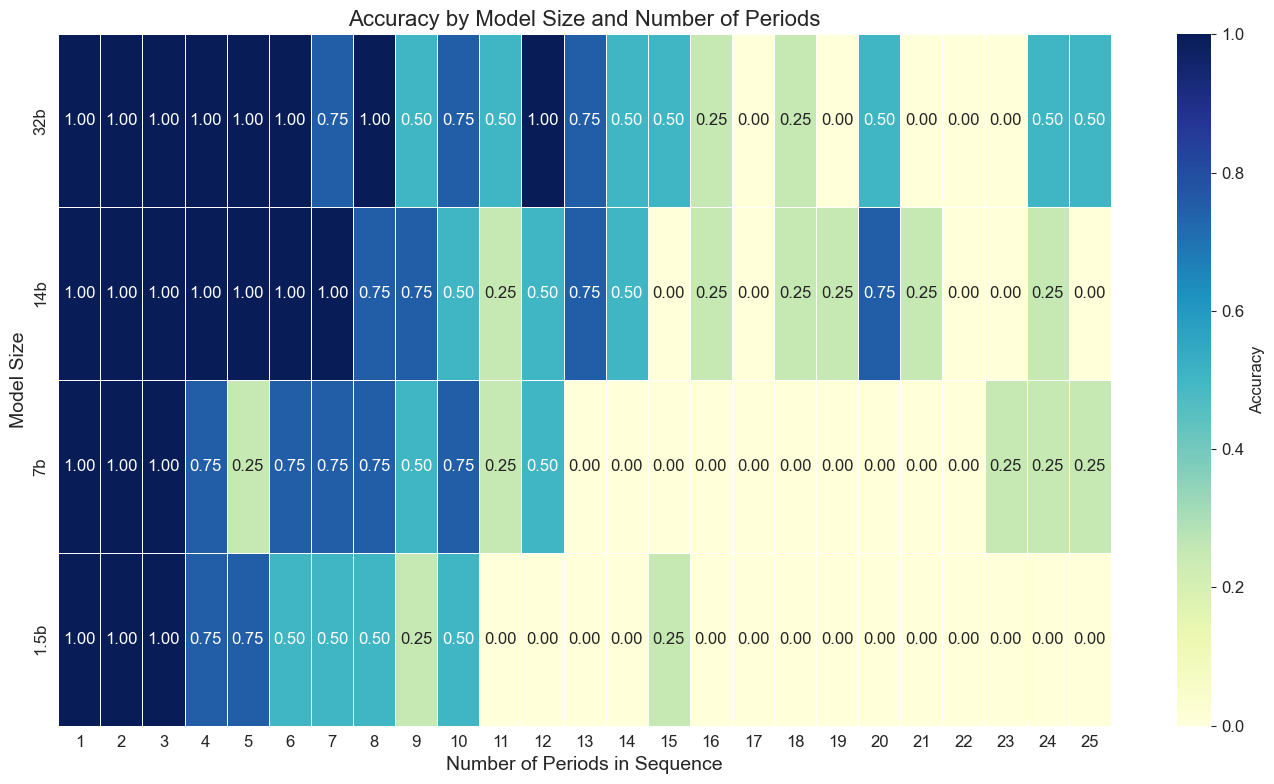

<Figure size 1400x800 with 0 Axes>

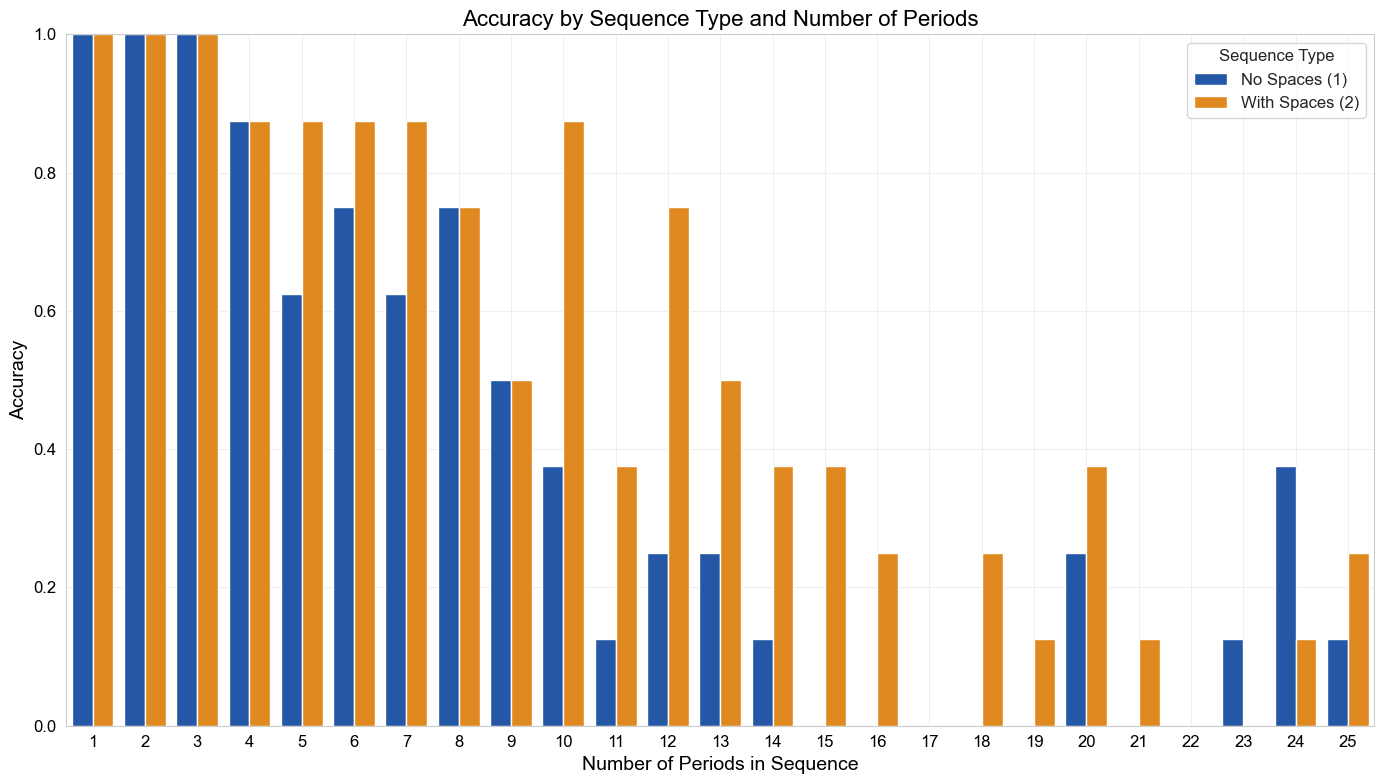

In [121]:
# Set up a consistent style for all plots
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})
colors = ['#0F52BA', '#FF8C00']  # Distinct colors for better visibility

# 1. Plot for prompt_type
plt.figure(figsize=(8, 5))
prompt_accuracy = df.groupby('prompt_type').mean(numeric_only=True)['correct']
ax = sns.barplot(x=prompt_accuracy.index, y=prompt_accuracy.values, palette=colors)
plt.xlabel('Prompt Type', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Average Accuracy by Prompt Type', fontsize=16)
plt.xticks([0, 1], ['Simple (1)', 'With Verification (2)'])
for i, v in enumerate(prompt_accuracy.values):
    ax.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
plt.tight_layout()
plt.show()

# 2. Plot for sequence_type
plt.figure(figsize=(8, 5))
sequence_accuracy = df.groupby('sequence_type').mean(numeric_only=True)['correct']
ax = sns.barplot(x=sequence_accuracy.index, y=sequence_accuracy.values, palette=colors)
plt.xlabel('Sequence Type', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Average Accuracy by Sequence Type', fontsize=16)
plt.xticks([0, 1], ['No Spaces (1)', 'With Spaces (2)'])
for i, v in enumerate(sequence_accuracy.values):
    ax.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
plt.tight_layout()
plt.show()

# 3. Plot for sequence_type and prompt_type
plt.figure(figsize=(10, 6))
seq_prompt_accuracy = df.groupby(['sequence_type', 'prompt_type']).mean(numeric_only=True)['correct'].unstack()
ax = seq_prompt_accuracy.plot(kind='bar', width=0.7)
plt.xlabel('Sequence Type', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy by Sequence Type and Prompt Type', fontsize=16)
plt.xticks([0, 1], ['No Spaces (1)', 'With Spaces (2)'], rotation=0)
plt.legend(['Simple Prompt (1)', 'Verification Prompt (2)'], title='Prompt Type')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
plt.tight_layout()
plt.show()

# 4. Plot for model and sequence_type
plt.figure(figsize=(12, 6))
model_seq_accuracy = df.groupby(['model', 'sequence_type']).mean(numeric_only=True)['correct']
model_seq_df = model_seq_accuracy.reset_index()
model_seq_df['model_size'] = model_seq_df['model'].map(model_size_dict)
model_seq_df = model_seq_df.sort_values('model_size')

# Create a grouped bar chart
ax = sns.barplot(x='model', y='correct', hue='sequence_type', data=model_seq_df, palette=colors)
plt.xlabel('Model Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy by Model Size and Sequence Type', fontsize=16)

# Ensure legend labels match the sequence types in the correct order
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['No Spaces (1)', 'With Spaces (2)'], title='Sequence Type')

# Add text labels on bars (black text for readability)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
plt.tight_layout()
plt.show()

# 5. Plot for model and prompt_type
plt.figure(figsize=(12, 6))
model_prompt_accuracy = df.groupby(['model', 'prompt_type']).mean(numeric_only=True)['correct']
model_prompt_df = model_prompt_accuracy.reset_index()
model_prompt_df['model_size'] = model_prompt_df['model'].map(model_size_dict)
model_prompt_df = model_prompt_df.sort_values('model_size')

# Create a grouped bar chart
ax = sns.barplot(x='model', y='correct', hue='prompt_type', data=model_prompt_df, palette=colors)
plt.xlabel('Model Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy by Model Size and Prompt Type', fontsize=16)
plt.legend(title='Prompt Type', labels=['Simple (1)', 'With Verification (2)'])

# Add text labels on bars
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
plt.tight_layout()
plt.show()

# Also update the model size accuracy plots
plt.figure(figsize=(10, 6))
accuracy_by_model = df.groupby('model').mean(numeric_only=True)['correct'].sort_index(key=lambda x: x.map(model_size_dict))
ax = sns.barplot(x=accuracy_by_model.index, y=accuracy_by_model.values, palette=colors)
plt.xlabel('Model Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Average Accuracy by Model Size', fontsize=16)
for i, v in enumerate(accuracy_by_model.values):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
plt.tight_layout()
plt.show()

# And update the accuracy by count plot
plt.figure(figsize=(12, 6))
accuracy_by_count = df.groupby('actual_count').mean(numeric_only=True)['correct']
plt.plot(accuracy_by_count.index, accuracy_by_count.values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Periods in Sequence', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Average Accuracy by Number of Periods', fontsize=16)
plt.grid(True, alpha=0.3)
plt.xticks(accuracy_by_count.index)
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1
for i, v in enumerate(accuracy_by_count.values):
    if v > 0.7 or v < 0.1 or accuracy_by_count.index[i] % 5 == 0:
        plt.text(accuracy_by_count.index[i], v + 0.03, f'{v:.2f}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# Add a new plot: Heatmap of accuracy by model size and number of periods
plt.figure(figsize=(14, 8))

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(
    values='correct', 
    index='model', 
    columns='actual_count', 
    aggfunc='mean'
)

# Create a list of models sorted by size (smallest to largest)
sorted_models = sorted(heatmap_data.index, key=lambda x: model_size_dict.get(x, 0))

# Reindex the heatmap data with the sorted models (reversed to put smallest at bottom)
heatmap_data = heatmap_data.reindex(sorted_models[::-1])

# Create the heatmap
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="YlGnBu", 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'label': 'Accuracy'},
    vmin=0,
    vmax=1
)

# Set labels and title
plt.xlabel('Number of Periods in Sequence', fontsize=14)
plt.ylabel('Model Size', fontsize=14)
plt.title('Accuracy by Model Size and Number of Periods', fontsize=16)

# Adjust the plot
plt.tight_layout()
plt.show()

# Add a new plot: Heatmap of accuracy by model size and number of periods
plt.figure(figsize=(14, 8))

# Create a grouped bar chart with properly matched legend colors
plt.figure(figsize=(14, 8))

# Prepare data
bar_data = df.groupby(['sequence_type', 'actual_count']).mean(numeric_only=True)['correct'].reset_index()

# Define colors for sequence types
sequence_labels = ['No Spaces (1)', 'With Spaces (2)']

# Create grouped bar chart
ax = sns.barplot(
    x='actual_count', 
    y='correct', 
    hue='sequence_type', 
    data=bar_data,
    palette=colors,
    hue_order=sorted(df['sequence_type'].unique())
)

# Set labels and title with black text
plt.xlabel('Number of Periods in Sequence', fontsize=14, color='black')
plt.ylabel('Accuracy', fontsize=14, color='black')
plt.title('Accuracy by Sequence Type and Number of Periods', fontsize=16, color='black')

# Get the handles and labels from the current legend
handles, _ = ax.get_legend_handles_labels()

# Create a new legend with the correct labels and matching colors
plt.legend(handles=handles, labels=sequence_labels, title='Sequence Type')

# Set y-axis limits
plt.ylim(0, 1.0)

# Set tick labels to black
plt.tick_params(colors='black')
for text in ax.get_xticklabels() + ax.get_yticklabels():
    text.set_color('black')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()